# 1. Import libraries and Create Spark Session + Context #

In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, Row
import collections

In [2]:
# Create or get a SparkContext
sc = SparkContext.getOrCreate()

# Create Spark Session
spark = SparkSession.builder.config('spark.cores.max', "16") \
                            .config("spark.executor.memory", "70g") \
                            .config("spark.driver.memory", "50g") \
                            .config("spark.memory.offHeap.enabled",True) \
                            .config("spark.memory.offHeap.size","16g") \
                            .getOrCreate()

24/01/23 20:48:37 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


# 2. Read data into Dataframe and convert to RDD #

In [3]:
df_udata = spark.read.csv("./ml-100k/u.data", sep = "\t",inferSchema = True)
df_udata.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: integer (nullable = true)



In [4]:
df_udata.show(10)

+---+---+---+---------+
|_c0|_c1|_c2|      _c3|
+---+---+---+---------+
|196|242|  3|881250949|
|186|302|  3|891717742|
| 22|377|  1|878887116|
|244| 51|  2|880606923|
|166|346|  1|886397596|
|298|474|  4|884182806|
|115|265|  2|881171488|
|253|465|  5|891628467|
|305|451|  3|886324817|
|  6| 86|  3|883603013|
+---+---+---+---------+
only showing top 10 rows



In [5]:
# Rename column
df_udata = df_udata.withColumnRenamed("_c0","userID") \
    .withColumnRenamed("_c1","itemID") \
    .withColumnRenamed("_c2","ratings") \
    .withColumnRenamed("_c3","timestamp")

In [6]:
# Sort data
df_udata = df_udata.sort(df_udata.userID.asc())

# Show data
df_udata.show(10)

+------+------+-------+---------+
|userID|itemID|ratings|timestamp|
+------+------+-------+---------+
|     1|   202|      5|875072442|
|     1|   171|      5|889751711|
|     1|    61|      4|878542420|
|     1|   253|      5|874965970|
|     1|    33|      4|878542699|
|     1|   155|      2|878542201|
|     1|    20|      4|887431883|
|     1|   117|      3|874965739|
|     1|   222|      4|878873388|
|     1|    47|      4|875072125|
+------+------+-------+---------+
only showing top 10 rows



In [7]:
# Convert to RDD
rdd_ratings = df_udata.rdd

# 3. Check data with RDD #

In [8]:
# Count data
print("Number of rows: ", rdd_ratings.count())

Number of rows:  100000


In [9]:
# Show data
rdd_ratings.take(10)

[Row(userID=1, itemID=61, ratings=4, timestamp=878542420),
 Row(userID=1, itemID=189, ratings=3, timestamp=888732928),
 Row(userID=1, itemID=33, ratings=4, timestamp=878542699),
 Row(userID=1, itemID=160, ratings=4, timestamp=875072547),
 Row(userID=1, itemID=20, ratings=4, timestamp=887431883),
 Row(userID=1, itemID=202, ratings=5, timestamp=875072442),
 Row(userID=1, itemID=171, ratings=5, timestamp=889751711),
 Row(userID=1, itemID=265, ratings=4, timestamp=878542441),
 Row(userID=1, itemID=155, ratings=2, timestamp=878542201),
 Row(userID=1, itemID=117, ratings=3, timestamp=874965739)]

# 4. Show the Ratings with Histogram #

In [10]:
# Create ratings_rdd
ratings_rdd = rdd_ratings.map(lambda row: row.ratings)
ratings_rdd.take(10)

[4, 3, 4, 4, 4, 5, 5, 4, 2, 3]

In [11]:
# Count appear for each value
value_count = ratings_rdd.countByValue()
value_count

defaultdict(int, {4: 34174, 3: 27145, 5: 21201, 2: 11370, 1: 6110})

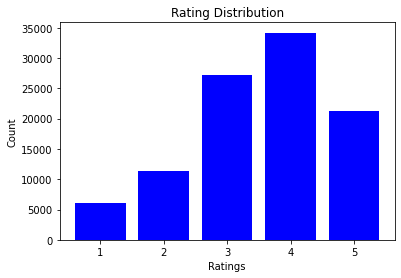

In [12]:
import matplotlib.pyplot as plt

# Extract keys (ratings) and values (counts) from defaultdict
ratings, counts = zip(*value_count.items())

# Plot bar chart
plt.bar(ratings, counts, color='blue')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()